Unnamed: 0      int64
Age             int64
G               int64
GS              int64
rAtt            int64
rYds            int64
rTD             int64
r1D             int64
rLng            int64
rY/A          float64
rY/g          float64
Fmb             int64
Year            int64
dtype: object
Unnamed: 0    0
Age           0
G             0
GS            0
rAtt          0
rYds          0
rTD           0
r1D           0
rLng          0
rY/A          0
rY/g          0
Fmb           0
Year          0
dtype: int64
        Unnamed: 0          Age            G           GS         rAtt  \
count  7516.000000  7516.000000  7516.000000  7516.000000  7516.000000   
mean   3865.128925    26.559606    11.891032     5.896221    42.838478   
std    2232.590591     3.581432     4.785148     5.953390    71.413859   
min       0.000000    21.000000     1.000000     0.000000     1.000000   
25%    1932.750000    24.000000     8.000000     0.000000     2.000000   
50%    3864.500000    26.000000    

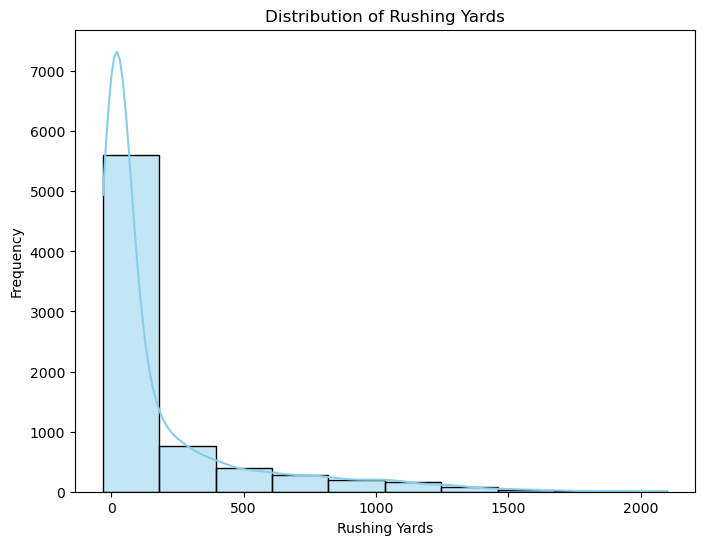

C:\Users\tacom\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


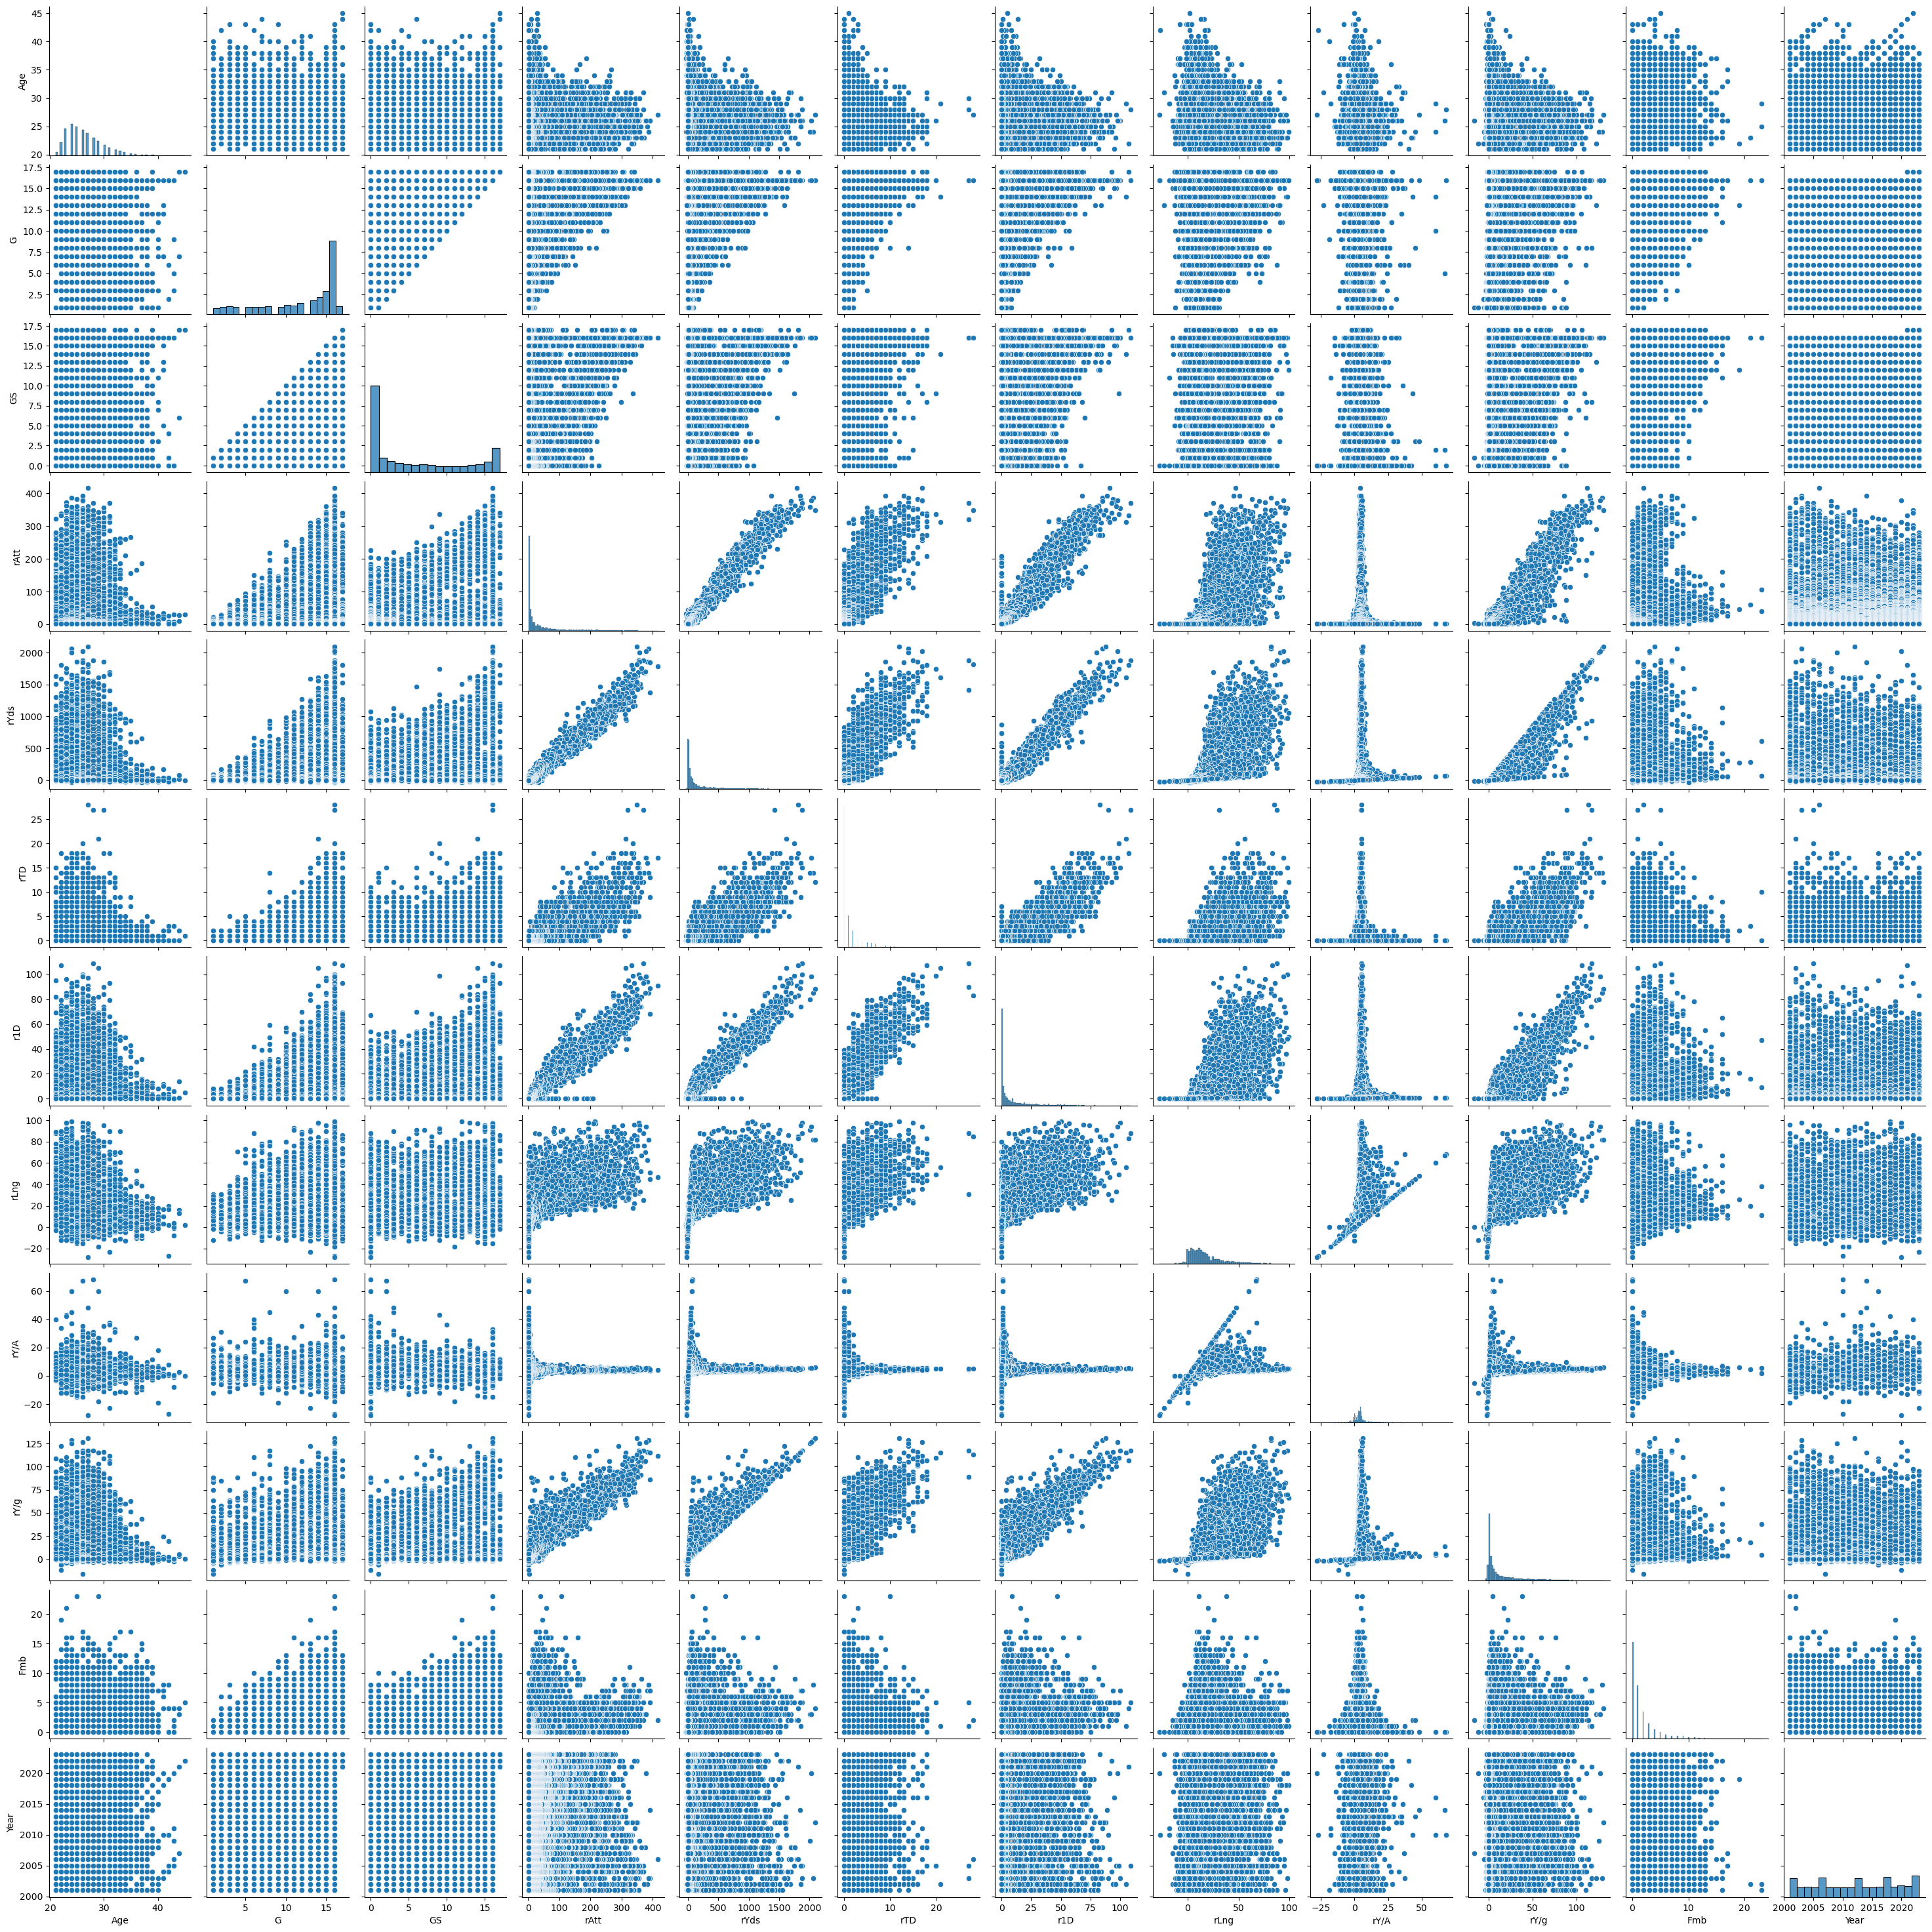

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('rushing_cleaned.csv')

# Remove the 'Player' column
df.drop(columns=['Player'], inplace=True)

# Check the data types of each feature
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Dealing with Null Values
# Replace missing values with the median for numerical features
num_features = ['Age', 'G', 'GS', 'rAtt', 'rYds', 'rTD', 'r1D', 'rLng', 'rY/A', 'rY/g', 'Fmb', 'Year']
num_imputer = SimpleImputer(strategy='median')
df[num_features] = num_imputer.fit_transform(df[num_features])

# Correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualization
# Histogram of rushing yards
plt.figure(figsize=(8, 6))
sns.histplot(df['rYds'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Rushing Yards')
plt.xlabel('Rushing Yards')
plt.ylabel('Frequency')
plt.show()

# Pairplot
sns.pairplot(df[['Age', 'G', 'GS', 'rAtt', 'rYds', 'rTD', 'r1D', 'rLng', 'rY/A', 'rY/g', 'Fmb', 'Year']])
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
selected_features = ['Age', 'G', 'GS', 'rAtt', 'rTD', 'r1D']
X = df[selected_features]
y = df['rYds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Train RMSE: 48.25623701665957
Test RMSE: 44.082165697184394
Train R^2 Score: 0.9766559803594732
Test R^2 Score: 0.978987945463084


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features for the model
features = ['Age', 'G', 'GS', 'rAtt', 'rYds', 'rTD', 'r1D', 'rLng', 'rY/A', 'rY/g', 'Fmb']

# Define the target variable
target = 'rYds'

# Split the data into features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


Train RMSE: 0.9136910877637735
Test RMSE: 2.82046617685574


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target variable (y)
X = df[['Age', 'G', 'GS', 'rAtt', 'rTD', 'r1D', 'rLng', 'rY/A', 'rY/g', 'Fmb']]
y = df['rYds']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regularization: Lasso Regression
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)

# Regularization: Ridge Regression
ridge = Ridge(alpha=0.1)  # Adjust alpha for regularization strength
ridge.fit(X_train, y_train)
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2)  # Adjust degree for polynomial features
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train and evaluate a model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
poly_train_pred = poly_model.predict(X_poly_train)
poly_test_pred = poly_model.predict(X_poly_test)

# Evaluate performance
def evaluate_model(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return rmse

# Evaluate Lasso Regression
lasso_train_rmse = evaluate_model(y_train, lasso_train_pred)
lasso_test_rmse = evaluate_model(y_test, lasso_test_pred)

# Evaluate Ridge Regression
ridge_train_rmse = evaluate_model(y_train, ridge_train_pred)
ridge_test_rmse = evaluate_model(y_test, ridge_test_pred)

# Evaluate Polynomial Regression
poly_train_rmse = evaluate_model(y_train, poly_train_pred)
poly_test_rmse = evaluate_model(y_test, poly_test_pred)

print("Lasso Regression Train RMSE:", lasso_train_rmse)
print("Lasso Regression Test RMSE:", lasso_test_rmse)
print("Ridge Regression Train RMSE:", ridge_train_rmse)
print("Ridge Regression Test RMSE:", ridge_test_rmse)
print("Polynomial Regression Train RMSE:", poly_train_rmse)
print("Polynomial Regression Test RMSE:", poly_test_rmse)


Lasso Regression Train RMSE: 40.212782754735066
Lasso Regression Test RMSE: 37.64469826193652
Ridge Regression Train RMSE: 40.21261978292096
Ridge Regression Test RMSE: 37.646513573339824
Polynomial Regression Train RMSE: 0.35181159617003605
Polynomial Regression Test RMSE: 0.3573743160142088
